In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
_split = 0.9

## Arima for VCB dataset

In [3]:
data_path = '../../Dataset/VCB.csv';

In [4]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [5]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2339 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2339 non-null   float64
dtypes: float64(1)
memory usage: 36.5 KB
None
              Close
count   2339.000000
mean   49573.071881
std    22421.327527
min    15680.371094
25%    25332.525391
50%    50432.792969
75%    66027.140625
max    97400.000000


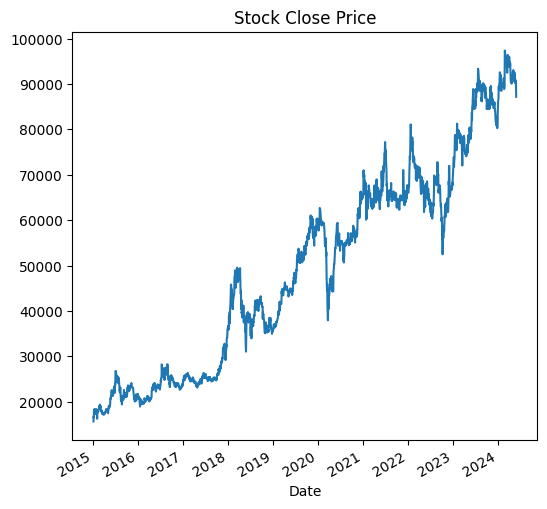

In [6]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [7]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [8]:
train_data

,Close
Date,
2015-01-05,15680.371094
2015-01-06,16712.621094
2015-01-07,16516.001953
2015-01-08,17007.550781
2015-01-09,18138.109375
...,...
2023-06-07,82133.781250
2023-06-08,84674.007812
2023-06-09,85097.375000


In [9]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (2105, 1)
Test set shape: (234, 1)


In [10]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -0.7272181228151362
Initial p-value: 0.8395729143966156
Differencing Level: 1
ADF Statistic: -29.724375692103642
p-value: 0.0
Series became stationary after 1 differencing levels.


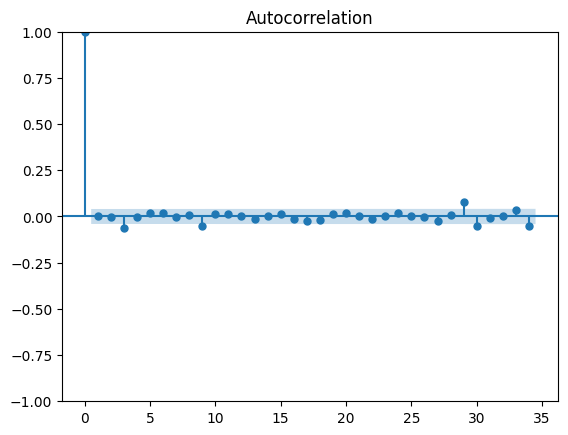

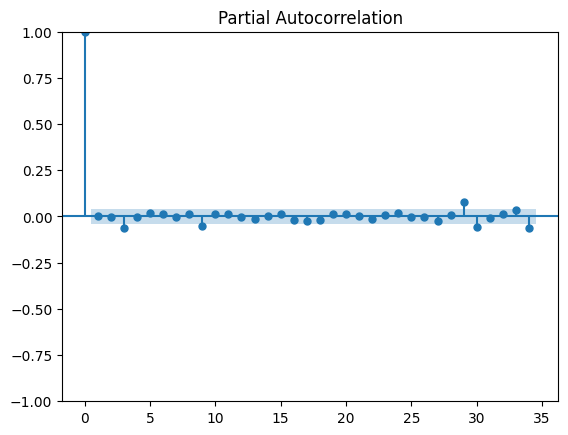

In [11]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [12]:
model = ARIMA(train_data, order=(3, 1, 3))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
model_fit = model.fit()

In [14]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2105
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -17264.778
Date:                Thu, 13 Jun 2024   AIC                          34543.557
Time:                        22:56:35   BIC                          34583.118
Sample:                             0   HQIC                         34558.045
                               - 2105                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1153      0.279      0.414      0.679      -0.431       0.661
ar.L2         -0.0632      0.288     -0.220      0.826      -0.628       0.501
ar.L3         -0.5976      0.270     -2.216      0.0

In [15]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [16]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_21928\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2023-06-14,86875.531250,86730.291891
2023-06-15,87637.593750,86673.741881
2023-06-16,88907.703125,86666.413080
2023-06-19,86113.460938,86710.527321
2023-06-20,84589.328125,86749.873158
...,...,...
2024-05-27,90200.000000,86719.954672
2024-05-28,90700.000000,86719.954672
2024-05-29,89800.000000,86719.954672


In [17]:
start = len(data) + 1
end = len(data) + 30
predict_30_days = model_fit.predict(start=start, end=end)
predict_30_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2340    86719.954672
2341    86719.954672
2342    86719.954672
2343    86719.954672
2344    86719.954672
2345    86719.954672
2346    86719.954672
2347    86719.954672
2348    86719.954672
2349    86719.954672
2350    86719.954672
2351    86719.954672
2352    86719.954672
2353    86719.954672
2354    86719.954672
2355    86719.954672
2356    86719.954672
2357    86719.954672
2358    86719.954672
2359    86719.954672
2360    86719.954672
2361    86719.954672
2362    86719.954672
2363    86719.954672
2364    86719.954672
2365    86719.954672
2366    86719.954672
2367    86719.954672
2368    86719.954672
2369    86719.954672
Name: predicted_mean, dtype: float64

In [18]:
predict_60_days = model_fit.predict(start=end, end=end+30)
predict_90_days = model_fit.predict(start=end+30, end=end+60)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [19]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [20]:
predict_30_days = pd.Series(predict_30_days.values, index=generate_date_array(test_data.index[-1], 30))
predict_30_days.index.name = 'Date'
predict_30_days

Date
2024-05-31    86719.954672
2024-06-03    86719.954672
2024-06-04    86719.954672
2024-06-05    86719.954672
2024-06-06    86719.954672
2024-06-07    86719.954672
2024-06-10    86719.954672
2024-06-11    86719.954672
2024-06-12    86719.954672
2024-06-13    86719.954672
2024-06-14    86719.954672
2024-06-17    86719.954672
2024-06-18    86719.954672
2024-06-19    86719.954672
2024-06-20    86719.954672
2024-06-21    86719.954672
2024-06-24    86719.954672
2024-06-25    86719.954672
2024-06-26    86719.954672
2024-06-27    86719.954672
2024-06-28    86719.954672
2024-07-01    86719.954672
2024-07-02    86719.954672
2024-07-03    86719.954672
2024-07-04    86719.954672
2024-07-05    86719.954672
2024-07-08    86719.954672
2024-07-09    86719.954672
2024-07-10    86719.954672
2024-07-11    86719.954672
dtype: float64

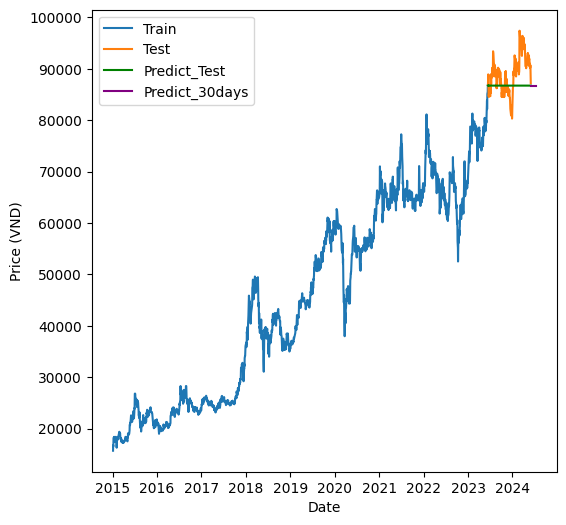

In [21]:
# Plot the results
plt.figure(figsize=(6, 6))
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='purple')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 4272.423
MAE: 3407.858
MAPE: 3.754


## Arima for BID dataset

In [23]:
data_path = '../../Dataset/BID.csv';

In [24]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [25]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2345 non-null   float64
dtypes: float64(1)
memory usage: 36.6 KB
None
              Close
count   2345.000000
mean   25785.842410
std    10557.656795
min     9101.712891
25%    15240.078125
50%    26740.693359
75%    32138.220703
max    54400.000000


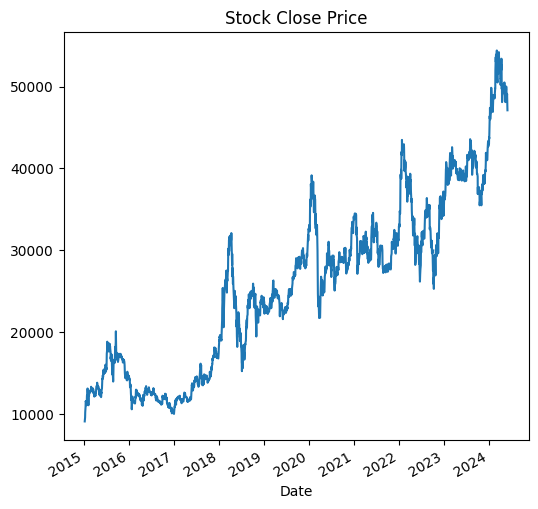

In [26]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [27]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [28]:
train_data

,Close
Date,
2015-01-05,9101.712891
2015-01-06,9313.380859
2015-01-07,9595.604492
2015-01-08,9595.604492
2015-01-09,10230.608398
...,...
2023-06-14,39045.167969
2023-06-15,38912.058594
2023-06-16,38778.949219


In [29]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (2110, 1)
Test set shape: (235, 1)


In [30]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -1.0662395859139857
Initial p-value: 0.7283457408139377
Differencing Level: 1
ADF Statistic: -50.07262520728113
p-value: 0.0
Series became stationary after 1 differencing levels.


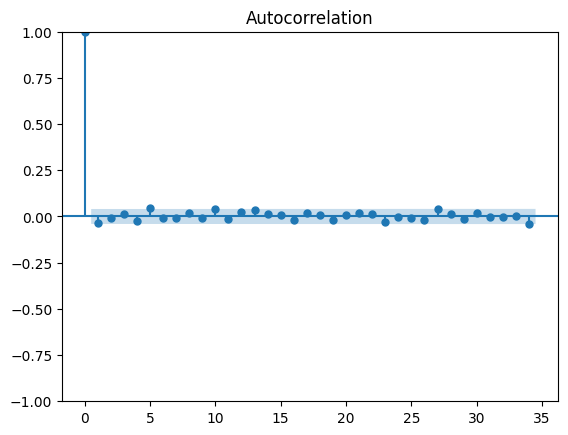

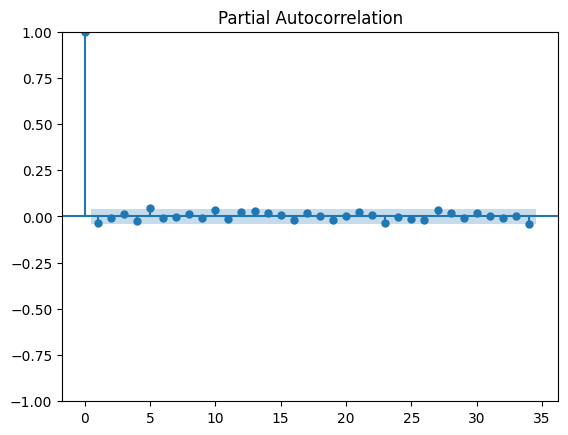

In [31]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [32]:
model = ARIMA(train_data, order=(3, 1, 3))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [33]:
model_fit = model.fit()

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2110
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -16465.229
Date:                Thu, 13 Jun 2024   AIC                          32944.458
Time:                        22:56:37   BIC                          32984.036
Sample:                             0   HQIC                         32958.951
                               - 2110                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3969      0.276      1.439      0.150      -0.144       0.937
ar.L2          0.2862      0.370      0.774      0.439      -0.438       1.011
ar.L3         -0.9301      0.272     -3.414      0.0

In [35]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [36]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_21928\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2023-06-21,38512.734375,38571.689723
2023-06-22,39000.796875,38561.475104
2023-06-23,39311.386719,38562.445515
2023-06-26,39311.386719,38577.246658
2023-06-27,39311.386719,38592.899021
...,...,...
2024-05-27,48900.000000,38578.869027
2024-05-28,49100.000000,38581.092610
2024-05-29,48600.000000,38583.497527


In [37]:
start = len(data) + 1
end = len(data) + 30
predict_30_days = model_fit.predict(start=start, end=end)
predict_30_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2346    38581.251360
2347    38579.084138
2348    38578.458042
2349    38579.748839
2350    38582.097597
2351    38583.981545
2352    38584.200983
2353    38582.642792
2354    38580.334981
2355    38578.768971
2356    38578.936130
2357    38580.700672
2358    38582.905329
2359    38584.129899
2360    38583.605782
2361    38581.697783
2362    38579.651585
2363    38578.780839
2364    38579.624162
2365    38581.612742
2366    38583.453205
2367    38583.968477
2368    38582.850241
2369    38580.842158
2370    38579.245884
2371    38579.077631
2372    38580.421624
2373    38582.391519
2374    38583.714501
2375    38583.553388
Name: predicted_mean, dtype: float64

In [38]:
predict_60_days = model_fit.predict(start=end, end=end+30)
predict_90_days = model_fit.predict(start=end+30, end=end+60)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [39]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [40]:
predict_30_days = pd.Series(predict_30_days.values, index=generate_date_array(test_data.index[-1], 30))
predict_30_days.index.name = 'Date'
predict_30_days

Date
2024-05-31    38581.251360
2024-06-03    38579.084138
2024-06-04    38578.458042
2024-06-05    38579.748839
2024-06-06    38582.097597
2024-06-07    38583.981545
2024-06-10    38584.200983
2024-06-11    38582.642792
2024-06-12    38580.334981
2024-06-13    38578.768971
2024-06-14    38578.936130
2024-06-17    38580.700672
2024-06-18    38582.905329
2024-06-19    38584.129899
2024-06-20    38583.605782
2024-06-21    38581.697783
2024-06-24    38579.651585
2024-06-25    38578.780839
2024-06-26    38579.624162
2024-06-27    38581.612742
2024-06-28    38583.453205
2024-07-01    38583.968477
2024-07-02    38582.850241
2024-07-03    38580.842158
2024-07-04    38579.245884
2024-07-05    38579.077631
2024-07-08    38580.421624
2024-07-09    38582.391519
2024-07-10    38583.714501
2024-07-11    38583.553388
dtype: float64

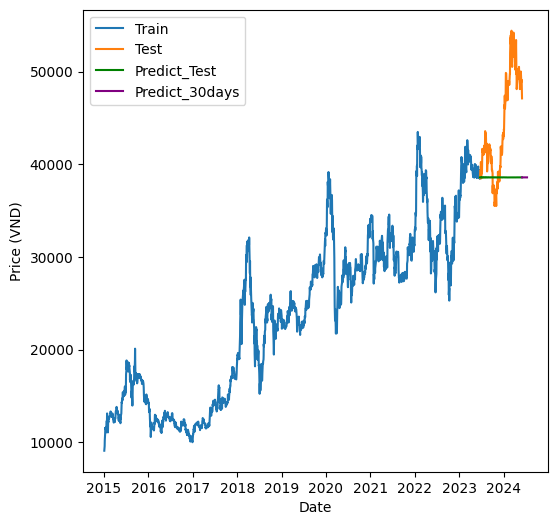

In [41]:
# Plot the results
plt.figure(figsize=(6, 6))
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='purple')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 7743.141
MAE: 5989.36
MAPE: 12.488


## Arima for CTG dataset

In [43]:
data_path = '../../Dataset/CTG.csv';

In [44]:
# Load the stock data
data = pd.read_csv(data_path) 
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [45]:
# Display dataset information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 2015-01-05 to 2024-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2345 non-null   float64
dtypes: float64(1)
memory usage: 36.6 KB
None
              Close
count   2345.000000
mean   19510.971566
std     7060.095727
min     9637.772461
25%    13451.279297
50%    16606.089844
75%    25729.027344
max    37719.050781


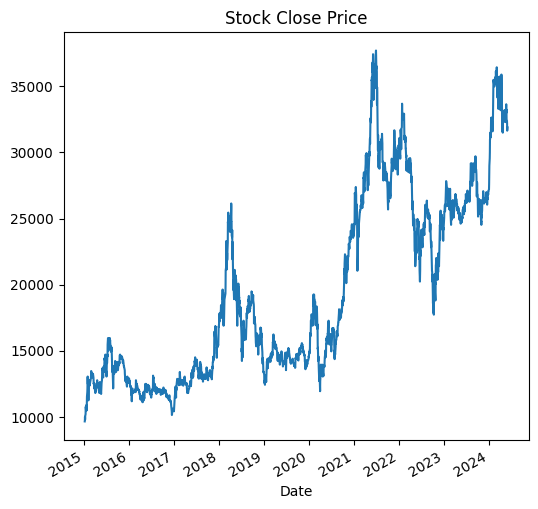

In [46]:
# Plot the data
data['Close'].plot(figsize=(6, 6))
plt.title("Stock Close Price")
plt.show()

In [47]:
# Split the data into training and test sets
train_size = int(len(data) * _split)
test_size = len(data) - train_size
train_data = data[0:train_size]
test_data = data[train_size:]

In [48]:
train_data

,Close
Date,
2015-01-05,9637.772461
2015-01-06,9707.109375
2015-01-07,9984.455078
2015-01-08,9776.445312
2015-01-09,10053.791992
...,...
2023-06-14,25684.279297
2023-06-15,25952.757812
2023-06-16,25505.294922


In [49]:
print("Training set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Training set shape: (2110, 1)
Test set shape: (235, 1)


In [50]:
# Perform initial ADF test
result = adfuller(data['Close'].dropna())
print(f'Initial ADF Statistic: {result[0]}')
print(f'Initial p-value: {result[1]}')

# Apply differencing iteratively until the series is stationary
differenced_data = data['Close']
diff_count = 0

while result[1] > 0.05:
    diff_count += 1
    differenced_data = differenced_data.diff().dropna()
    result = adfuller(differenced_data)
    print(f'Differencing Level: {diff_count}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

print(f'Series became stationary after {diff_count} differencing levels.')

Initial ADF Statistic: -1.3022211165237332
Initial p-value: 0.6281555385005244
Differencing Level: 1
ADF Statistic: -51.10753306643303
p-value: 0.0
Series became stationary after 1 differencing levels.


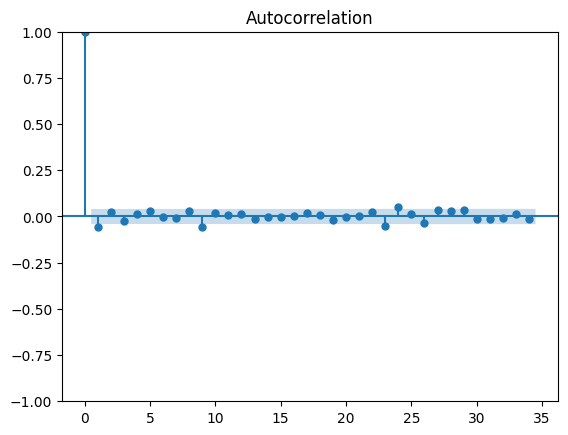

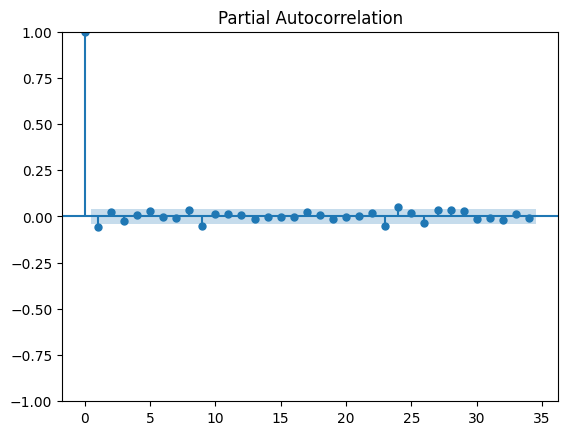

In [51]:
# Plot the ACF and PACF
plot_acf(differenced_data)
plot_pacf(differenced_data)
plt.show()


In [52]:
model = ARIMA(train_data, order=(3, 1, 3))

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [53]:
model_fit = model.fit()

In [54]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2110
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -15869.200
Date:                Thu, 13 Jun 2024   AIC                          31752.400
Time:                        22:56:39   BIC                          31791.978
Sample:                             0   HQIC                         31766.893
                               - 2110                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0239      0.212      0.113      0.910      -0.392       0.440
ar.L2          0.0769      0.189      0.407      0.684      -0.293       0.447
ar.L3         -0.7767      0.168     -4.621      0.0

In [55]:
start = len(train_data) + 1
end = len(train_data) + len(test_data)
test_predictions = model_fit.predict(start=start, end=end)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [56]:
test_data['Prediction'] = test_predictions.values
test_data

C:\Users\vanma\AppData\Local\Temp\ipykernel_21928\2547438770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = test_predictions.values


,Close,Prediction
Date,,
2023-06-21,26086.996094,26128.380802
2023-06-22,26355.472656,26113.340993
2023-06-23,26176.488281,26112.196426
2023-06-26,26176.488281,26114.102030
2023-06-27,26265.980469,26125.741173
...,...,...
2024-05-27,32400.000000,26120.781870
2024-05-28,32200.000000,26120.781868
2024-05-29,31650.000000,26120.781870


In [57]:
start = len(data) + 1
end = len(data) + 30
predict_30_days = model_fit.predict(start=start, end=end)
predict_30_days

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2346    26120.781868
2347    26120.781870
2348    26120.781868
2349    26120.781870
2350    26120.781868
2351    26120.781870
2352    26120.781869
2353    26120.781869
2354    26120.781869
2355    26120.781869
2356    26120.781869
2357    26120.781869
2358    26120.781869
2359    26120.781869
2360    26120.781869
2361    26120.781869
2362    26120.781869
2363    26120.781869
2364    26120.781869
2365    26120.781869
2366    26120.781869
2367    26120.781869
2368    26120.781869
2369    26120.781869
2370    26120.781869
2371    26120.781869
2372    26120.781869
2373    26120.781869
2374    26120.781869
2375    26120.781869
Name: predicted_mean, dtype: float64

In [58]:
predict_60_days = model_fit.predict(start=end, end=end+30)
predict_90_days = model_fit.predict(start=end+30, end=end+60)

c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\vanma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [59]:
from datetime import datetime, timedelta

def generate_date_array(start_date, length):
    date_array = []
    current_date = start_date

    while len(date_array) < length:
        if current_date.weekday() < 5:  # Check if it's a weekday
            date_array.append(current_date)
        current_date += timedelta(days=1)  # Move to the next day

    return date_array

In [60]:
predict_30_days = pd.Series(predict_30_days.values, index=generate_date_array(test_data.index[-1], 30))
predict_30_days.index.name = 'Date'
predict_30_days

Date
2024-05-31    26120.781868
2024-06-03    26120.781870
2024-06-04    26120.781868
2024-06-05    26120.781870
2024-06-06    26120.781868
2024-06-07    26120.781870
2024-06-10    26120.781869
2024-06-11    26120.781869
2024-06-12    26120.781869
2024-06-13    26120.781869
2024-06-14    26120.781869
2024-06-17    26120.781869
2024-06-18    26120.781869
2024-06-19    26120.781869
2024-06-20    26120.781869
2024-06-21    26120.781869
2024-06-24    26120.781869
2024-06-25    26120.781869
2024-06-26    26120.781869
2024-06-27    26120.781869
2024-06-28    26120.781869
2024-07-01    26120.781869
2024-07-02    26120.781869
2024-07-03    26120.781869
2024-07-04    26120.781869
2024-07-05    26120.781869
2024-07-08    26120.781869
2024-07-09    26120.781869
2024-07-10    26120.781869
2024-07-11    26120.781869
dtype: float64

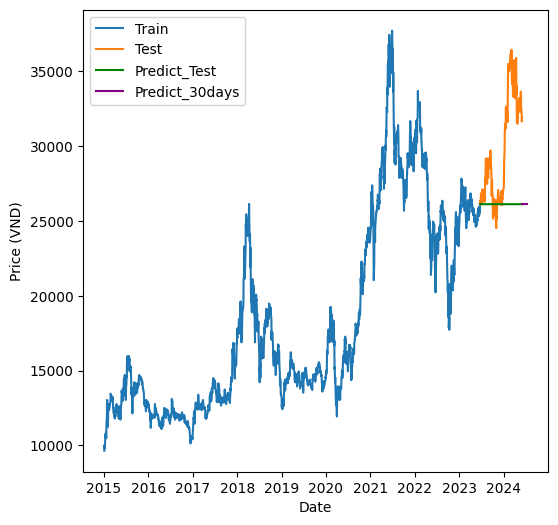

In [61]:
# Plot the results
plt.figure(figsize=(6, 6))
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')
plt.plot(test_data.index, test_data['Prediction'], label='Predict_Test', color='green')
plt.plot(predict_30_days.index, predict_30_days, label='Predict_30days', color='purple')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Prediction']))

# Calculate MAE
mae = mean_absolute_error(test_data['Close'], test_data['Prediction'])

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], test_data['Prediction'])

print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))
print("MAPE:", round(mape, 3))

RMSE: 4943.137
MAE: 3632.346
MAPE: 11.152
